In [18]:
import pandas as pd
import json
import numpy as np
import re
from ast import literal_eval
import matplotlib.pyplot as plt


In [33]:
'''
The json data contain participant number, the iteration audio name, the rating, and the melody audio number

'OriginalAudio': indicates the particular iteration the audio file is retrieved from.
'''

f =open("behavioural_results.json")

In [20]:
data = json.loads(f.read())

In [21]:
file_names = {'pop':['pop_audio4','pop_audio10','pop_audio13','pop_audio16','pop_audio30','pop_audio23'],
             'bach':['01ausmei','03achgot','09ermunt','14oherre','15christ','catech1'],
             'jazz':['jazz_audio1','jazz_audio8','jazz_audio10','jazz_audio2','jazz_audio17','jazz_audio4'],
             'classical':['Beth_audio_1','Choplin_audio_4','Choplin_audio_6','Mozart_audio_3','muss_1','Schubert_audio_2']}

In [34]:
# data

In [22]:
# Arr to store the data
pop = []
bach=[]
jazz=[]
classical=[]

In [31]:
# Classifies the data into genres to do the analysis
def classify_data(data):
    pop = []
    bach=[]
    jazz=[]
    classical=[]
    for i in data:
#         retireves the first index
        all_items=list(data[i].values())[0]

        for item in all_items:

            original_audio = item['OriginalAudio']
            rating =  int(item['Rating'])
    #         print(type(rating))
            iteration=item['iteration']
#             print(iteration)
            sep = '/'
#     Gets the iteration number and audio name
            audio_name = original_audio.split(sep, 1)[0]
            iteration_name = iteration.split(sep,1)[1]
            genre_name = ""
            for i in file_names:

                for a in file_names[i]:
                    if a == audio_name:
                        genre_name = i
    #                     print(genre_name)
                        break
#         appends it to array
            if genre_name =='jazz':
                jazz.append([audio_name,iteration_name,int(rating)])
            elif genre_name =='pop':
                pop.append([audio_name,iteration_name,int(rating)])
            elif genre_name=='bach':
                bach.append([audio_name,iteration_name,int(rating)])
            elif genre_name=='classical':
                classical.append([audio_name,iteration_name,int(rating)])
    return pop,jazz,classical,bach


In [30]:
pop,jazz,classical,bach=classify_data(data)
pop_df = pd.DataFrame(pop,columns=['Audio name','Iterations','Rating'])

iterations = pop_df['Iterations']
rating = pop_df['Rating']
# pop_df

In [29]:

'''
Plots the behavioural analysis plot, arr and title as input

arr: Pop, bach,classical, jazz
'''
def plot_analysis(arr,title):
    df = pd.DataFrame(arr,columns=['Audio name','Iteration','Rating'])
    number_of_iterations = sorted(set(df['Iteration']))
#     print(df)
    labels =[]
    CTEs=[]
    errors=[]
    
    for i in number_of_iterations:
        iteration = df.loc[df['Iteration']==i]
        rating = iteration['Rating']
#         print(rating)
        std_error = np.std(rating, ddof=1) / np.sqrt(len(rating))
#         print(std_error)
        average = np.mean(rating)
#         print(average)
        CTEs.append(average)
        errors.append(std_error)
        if i=="initial_iteration":
            labels.append("Iteration1")
        elif i=="iteration1":
            labels.append('Iteration2')
        elif i=="iteration2":
            labels.append("Iteration3")
        elif i=="iteration3":
            labels.append("Iteration4")
        
    
    x_pos = np.arange(len(labels))
    print(x_pos)
    fig = plt.figure(figsize = (5,5))
    plt.rcParams["font.family"] = "Times New Roman"

    ax = fig.subplots()
    
#     x_ticks_labels=["Definitely not the melody I hummed","A bit like the melody I hummed","It is exactly the melody I hummed"]
    ax.bar(x_pos, CTEs,
           yerr=errors,
           align='center',
           color="silver",
           capsize=15,width=0.5)
    ax.set_ylabel('',fontsize=25)
    ax.set_title(title,fontsize=20,fontweight="bold")

    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels,fontsize=12)
    ax.set_yticks([1,3,5])
#     ax.set_yticklabels(x_ticks_labels,fontsize=10)
    # ax.set_title('Deviation of correlation after each iteration for classical music pieces')
    plt.xlabel('Iterations', fontsize=30)
    plt.ylabel('Rating', fontsize=30)
    plt.yticks(fontsize=18)

    plt.xticks(fontsize=18)

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()


[0 1]


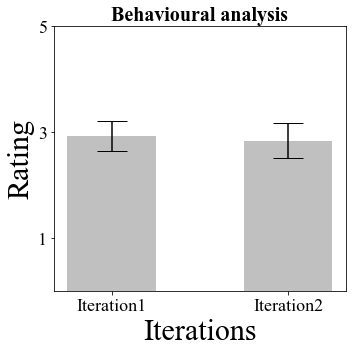

In [27]:
plot_analysis(classical,"Behavioural analysis")